# CALCULATE ENERGETICS FROM GOTM 1D SIMS

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import h5py
from pylab import *
import scipy.integrate as integrate
#from cmocean import cm as cmo
import matplotlib.gridspec as gridspec
import matplotlib.ticker 
import scipy.stats as stats
import scipy.optimize as optimize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.signal import savgol_filter
from netCDF4 import Dataset

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [14]:
filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/GOTMOUTPUTS/gotm_1e-5_0p02.nc' # Ruan et al. 2019 case F
filename = '/data/thomas/jacob13/SI_ON_A_SLOPE/GOTMOUTPUTS/gotm_2e-5_0p005.nc' # Umlauf et al. 2015 case (diff int vel)

ds =  Dataset(filename, 'r')  # Dataset is the class behavior to open the file
N2 = 2e-5
tht = 0.005

u = np.squeeze(ds.variables['u'])
v = np.squeeze(ds.variables['v'])
b = np.squeeze(ds.variables['buoy'])

SP = np.squeeze(ds.variables['P'])
VBP = np.squeeze(ds.variables['G'])
EPS = np.squeeze(ds.variables['eps'])
taub = np.squeeze(ds.variables['taub'])
tke = np.squeeze(ds.variables['tke'])
time = ds.variables['time'][:]

z1 = ds.variables['z1'][:][0,:,0,0]
z = ds.variables['z'][:][0,:,0,0]
bpert = b - N2*z

In [15]:
# Cumulative vertical integrals
SPI = integrate.trapz(SP, x=z1, axis=-1)
VBPI = integrate.trapz(VBP, x=z1, axis=-1)
EPSI = integrate.trapz(EPS, x=z1, axis=-1)
TKEI = integrate.trapz(tke, x=z1, axis=-1)
MKEMPEI = integrate.trapz(u*bpert*np.sin(tht), x=z, axis=-1)
MKEI = integrate.trapz(0.5*(u**2 + (v-0.1)**2), x=z, axis=-1)

# Time cumulative integrals
SPIT = integrate.cumtrapz(SPI, x=time, axis=0, initial=0)
VBIT = integrate.cumtrapz(VBPI, x=time, axis=0, initial=0)
EPSIT = integrate.cumtrapz(EPSI, x=time, axis=0, initial=0)
DRAGIT = integrate.cumtrapz(0.1*taub/1030, x=time, axis=0, initial=0)
MKEMPEIT = integrate.cumtrapz(MKEMPEI, x=time, axis=0, initial=0)
# MKEIT = integrate.cumtrapz(MKEI, x=time, axis=0, initial=0)
# TKEIT = integrate.cumtrapz(TKEI, x=time, axis=0, initial=0)

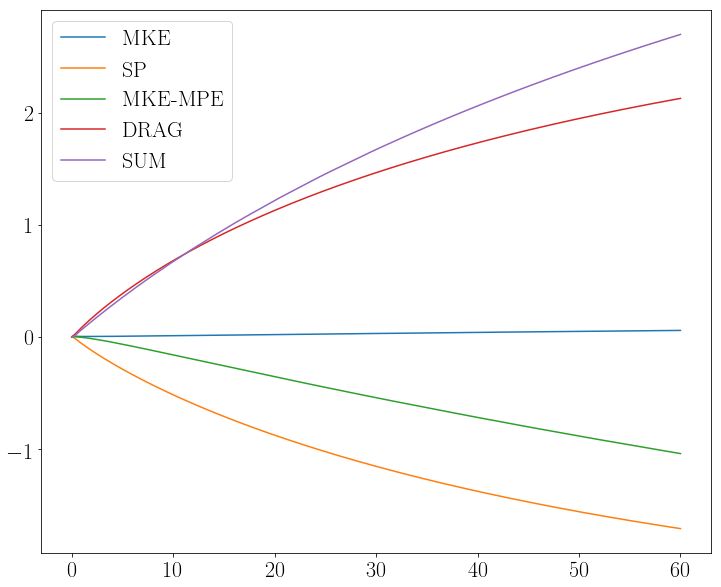

In [25]:
plt.figure(figsize=(12,10))
# plt.plot(time/86400, TKEI, label='TKE')
plt.plot(time/86400, MKEI-MKEI[0], label='MKE')

plt.plot(time/86400, -SPIT, label='SP')
# plt.plot(time/86400, VBIT, label='VBP')
plt.plot(time/86400, MKEMPEIT, label='MKE-MPE')

# plt.plot(time/86400, -EPSIT, label='DISS')
plt.plot(time/86400, DRAGIT, label='DRAG')
plt.plot(time/86400, -(MKEI-MKEI[0] -SPIT+MKEMPEIT), label='SUM')

plt.legend()

In [7]:
ds.variables['z']

<class 'netCDF4._netCDF4.Variable'>
float32 z(time, z, lat, lon)
    units: m
    long_name: depth
    standard_name: ??
    coordinates: lon lat z
    cell_methods: time: point
unlimited dimensions: time
current shape = (1441, 300, 1, 1)
filling off

In [ ]:
plt.pcolor(time, z, np.transpose(u))
plt.colorbar()